In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv('olimpic_medals.csv')

df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [3]:
df_1936 = df[df['Edition'] == 1936]
vector_a = df['Athlete'].map(lambda a: ('Jesse' in a) and ('OWENS' in a))

print(f'Jesse Owens won {len(df_1936[vector_a])} medals in 1936')

Jesse Owens won 4 medals in 1936


<ipython-input-3-297fcd1e5cd0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Jesse Owens won {len(df_1936[vector_a])} medals in 1936')


In [4]:
vector = (df['Sport'] == 'Badminton') & (df['Gender'] == 'Men') & (df['Medal'] == 'Gold')

selected_medals_country = df[vector]['NOC'].value_counts()
print(f"{selected_medals_country.idxmax()} has the biggest amount of gold medals in badminton, M")

INA has the biggest amount of gold medals in badminton, M


In [5]:
vector_y = (df['Edition'] >= 1984) & (df['Edition'] <= 2008)

three_countries = tuple(df[vector_y]['NOC'].value_counts().iloc[: 3].index)
print('{}, {} and {} have the biggest amount of gold medals for the last years'.format(*three_countries))

USA, AUS and GER have the biggest amount of gold medals for the last years


In [6]:
vector = (df['Event'] == '100m') & (df['Gender'] == 'Men') & (df['Medal'] == 'Gold')

df[vector].loc[:, ['City', 'Edition', 'Athlete', 'NOC']].sort_values('Edition', ascending=False)

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


In [7]:
genders = df.loc[:, ['Medal', 'Gender']]

for gender, group in genders.groupby('Gender'):
    print(f"{gender} won {len(group)} medals total,")
    for medal, gr in group.groupby('Medal'):
        print(medal, len(gr))
    print()

Men won 21721 medals total,
Bronze 7175
Gold 7365
Silver 7181

Women won 7495 medals total,
Bronze 2514
Gold 2485
Silver 2496



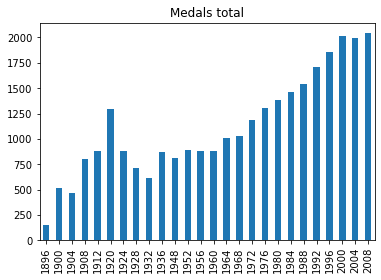

In [8]:
df['Edition'].value_counts().sort_index().plot.bar(title='Medals total')

In [9]:
cols = ['First', 'Last', 'Total']
country_medals = pd.DataFrame(columns=cols)

for country, country_df in df.groupby('NOC'):
    s = country_df['Edition']
    
    country_s = pd.Series([s.min(), s.max(), s.size], index=cols, name=country)
    country_medals = country_medals.append(country_s)
    
country_medals

,First,Last,Total
AFG,2008,2008,1
AHO,1988,1988,1
ALG,1984,2008,14
ANZ,1908,1912,29
ARG,1924,2008,239
...,...,...,...
VIE,2000,2008,2
YUG,1924,2000,435
ZAM,1984,1996,2
ZIM,1980,2008,23


In [10]:
vector = (df['City'] == 'Beijing') & ((df['Event'] == '100m') | (df['Event'] == '200m'))
print('Beijing 100m/200m medalists:', *df[vector]['Athlete'].unique(), sep='\n')

Beijing 100m/200m medalists:
DIX, Walter
BOLT, Usain
THOMPSON, Richard
FRASER, Shelly-ann
SIMPSON, Sherone
STEWART, Kerron
CRAWFORD, Shawn
CAMPBELL-BROWN, Veronica
FELIX, Allyson


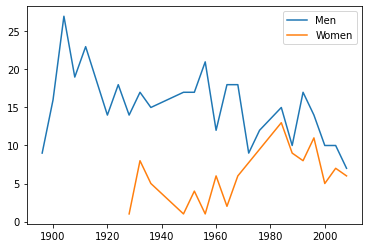

In [11]:
vector = (df['Sport'] == 'Athletics') & (df['NOC'] == 'USA') & (df['Sport'] == 'Athletics') & (df['Medal'] == 'Gold')
usa_gold_ath = df[vector]

usa_gold_ath[usa_gold_ath['Gender'] == 'Men']['Edition'].value_counts().sort_index().plot(label='Men', legend=True)
usa_gold_ath[usa_gold_ath['Gender'] == 'Women']['Edition'].value_counts().sort_index().plot(label='Women', legend=True)

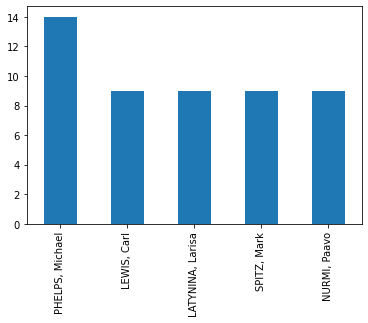

In [12]:
golds = df[df['Medal'] == 'Gold']
golds['Athlete'].value_counts().iloc[:5].plot.bar()

In [13]:
df[df['Edition'] == df['Edition'].max()]['NOC'].value_counts()

USA    315
CHN    184
AUS    149
RUS    143
GER    101
      ... 
ECU      1
VEN      1
EGY      1
CMR      1
PAN      1
Name: NOC, Length: 86, dtype: int64

In [15]:
usa = df[df['NOC'] == 'USA']

cols = ['Edition', 'Athlete', 'Discipline']
top_usa = pd.DataFrame(columns=cols)
for year, group in usa.groupby('Edition'):
    top_ath = group['Athlete'].value_counts().idxmax()
    discipline = group.loc[group['Athlete'] == top_ath, ['Discipline']]
    s = pd.Series([year, top_ath, discipline.iloc[0, 0]], index=cols)
    
    top_usa = top_usa.append(s, ignore_index=True)
top_usa

,Edition,Athlete,Discipline
0,1896,"GARRETT, Robert",Athletics
1,1900,"BAXTER, Irving",Athletics
2,1904,"EYSER, George",Artistic G.
3,1908,"SHERIDAN, Martin",Athletics
4,1912,"OSBURN, Carl Townsend",Shooting
5,1920,"LEE, Willis",Shooting
6,1924,"WEISSMULLER, Johnny",Swimming
7,1928,"COLEMAN, Georgia V.",Diving
8,1932,"MADISON, Helene",Swimming
9,1936,"OWENS, Jesse",Athletics
